In [29]:
# required libaries:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [6]:
# data import:

data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data Pre processing

In [8]:
# check is there any missing values:
missing_values = data.isnull().sum()
missing_values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
#check is there any duplicate values:
duplicates = data.duplicated().sum()
duplicates

0

In [11]:
#check datatype:
data_types = data.dtypes
data_types

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

there is no duplicates values, 24 missing values in income and all varibales are in proper format except dt_customer

In [13]:
# Convert Dt_Customer to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='mixed')

In [14]:
# Evaluate the distribution of Income to decide on handling missing values
income_distribution = data['Income'].describe()

income_distribution

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

using the median to fill missing values could be a more robust approach to minimize the impact of these outliers.

In [15]:
# Fill missing values in the Income column with the median income
data['Income'].fillna(data['Income'].median(), inplace=True)

### Feature Engineering

In [17]:
# 1. Customer's Age
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']


In [18]:
# 2. Total Amount Spent by a single customers
data['Total_Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [19]:
# 3. Total Number of Purchases a single customer make
data['Total_Purchases'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)


In [20]:
data[['Age', 'Total_Spent', 'Total_Purchases']].head()

,Age,Total_Spent,Total_Purchases
0,67,1617,25
1,70,27,6
2,59,776,21
3,40,53,8
4,43,422,19


### exploratory data analysis (EDA)

1. Distribution of key variables: Age, Total Spent, Total Purchases, and Income.2. 
Relationships between key variables: For example, how Total Spent correlates with Age or Income
3. Segmentation variables analysis: Brief look into categorical variables like Education and Marital Status to understand the customer base.e.

In [24]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

Distribution of key variables: Age, Total Spent, Total Purchases, and Income.

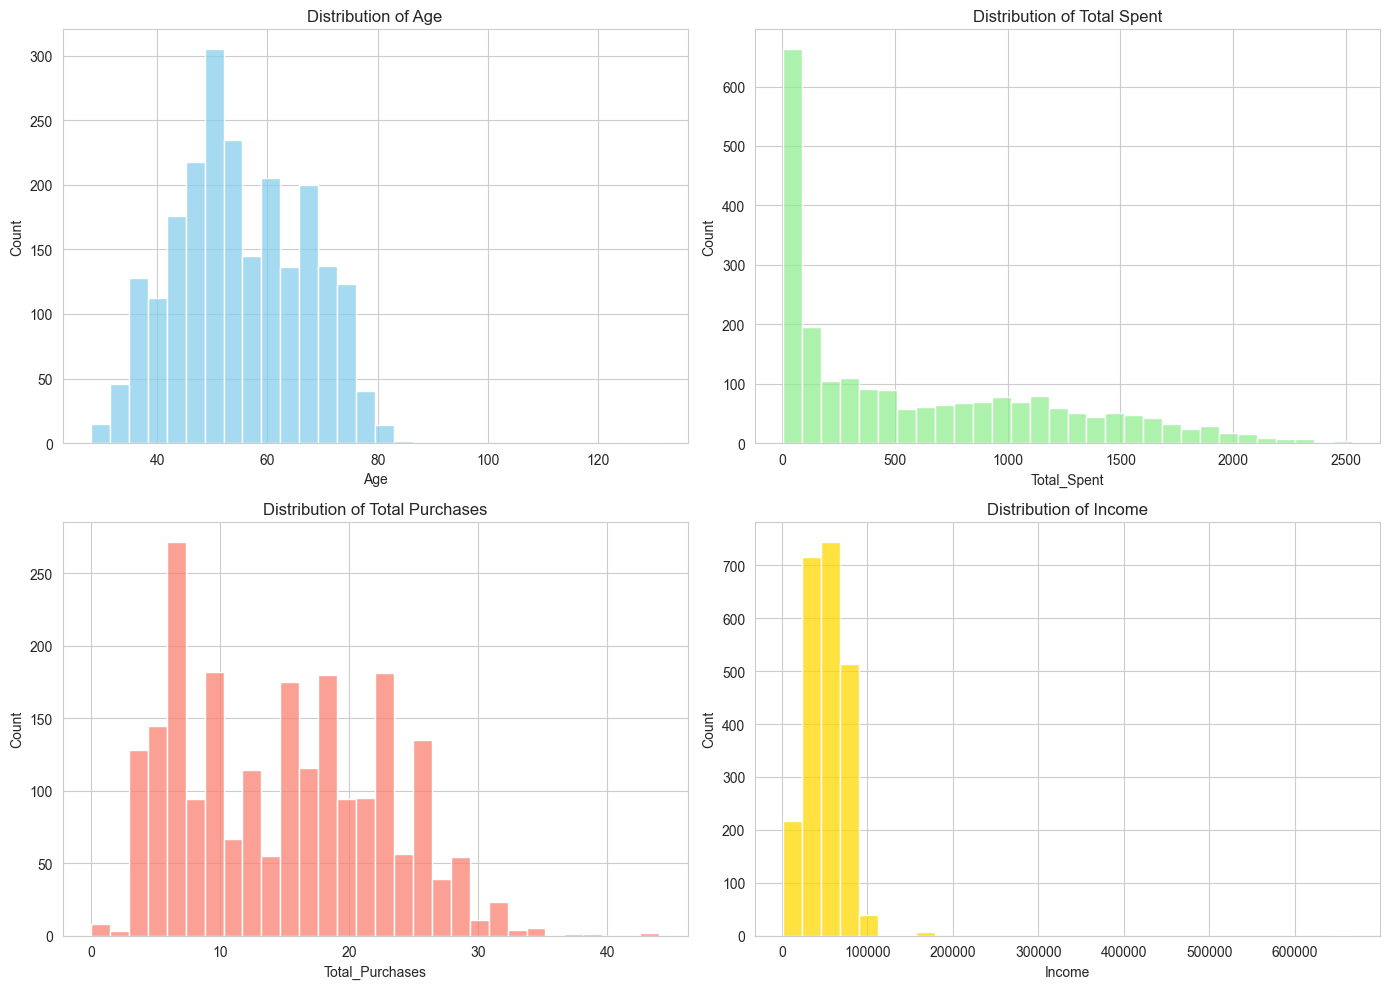

In [25]:
# Create a figure for the distributions
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Age
sns.histplot(data['Age'], bins=30, ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Distribution of Age')

# Distribution of Total Spent
sns.histplot(data['Total_Spent'], bins=30, ax=ax[0, 1], color='lightgreen')
ax[0, 1].set_title('Distribution of Total Spent')

# Distribution of Total Purchases
sns.histplot(data['Total_Purchases'], bins=30, ax=ax[1, 0], color='salmon')
ax[1, 0].set_title('Distribution of Total Purchases')

# Distribution of Income
sns.histplot(data['Income'], bins=30, ax=ax[1, 1], color='gold')
ax[1, 1].set_title('Distribution of Income')

plt.tight_layout()
plt.show()

Relationships between key variables: For example, how Total Spent correlates with Age or Income.

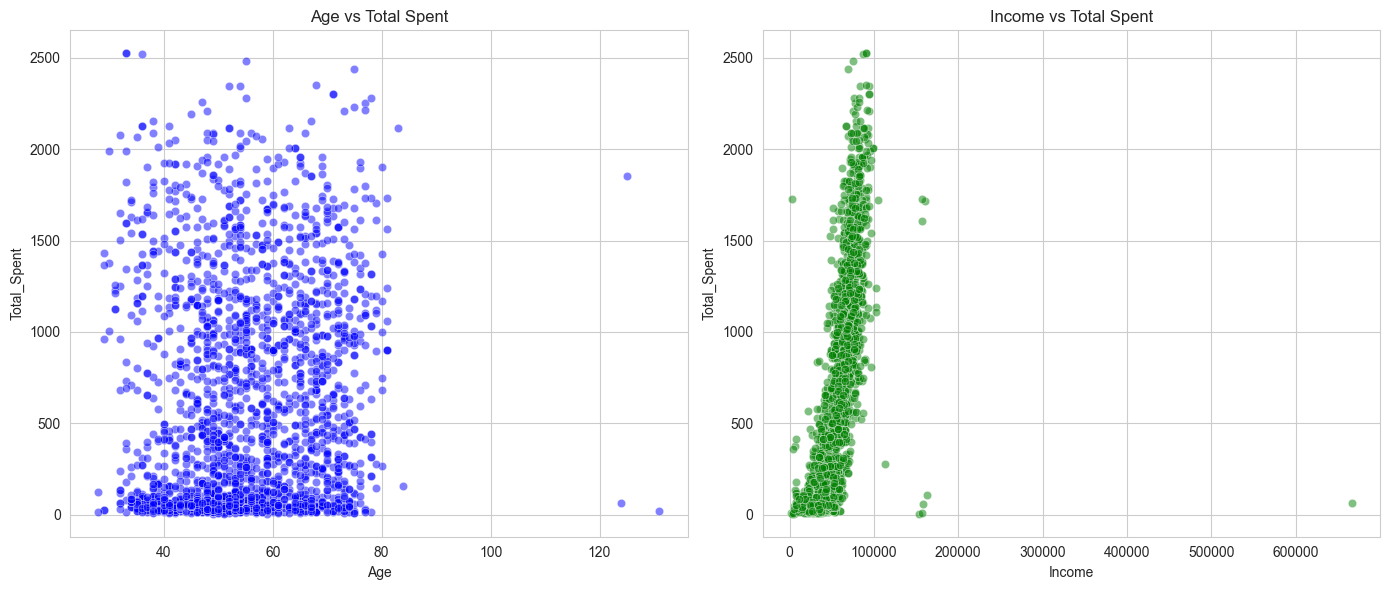

In [27]:
# Create a figure for the scatter plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Relationship between Age and Total Spent
sns.scatterplot(x='Age', y='Total_Spent', data=data, ax=ax[0], color='blue', alpha=0.5)
ax[0].set_title('Age vs Total Spent')

# Relationship between Income and Total Spent
sns.scatterplot(x='Income', y='Total_Spent', data=data, ax=ax[1], color='green', alpha=0.5)
ax[1].set_title('Income vs Total Spent')

plt.tight_layout()
plt.show()


1. This suggests that customer spending on products is not heavily dependent on their age. Customers across a wide range of ages tend to spend similarly, indicating that factors other than age might be more influential in determining how much customers spend.
2. This indicates a relationship where customers with higher incomes are likely to spend more, which aligns with intuitive expectations.

Segmentation variables analysis: Brief look into categorical variables like Education and Marital Status to understand the customer base.

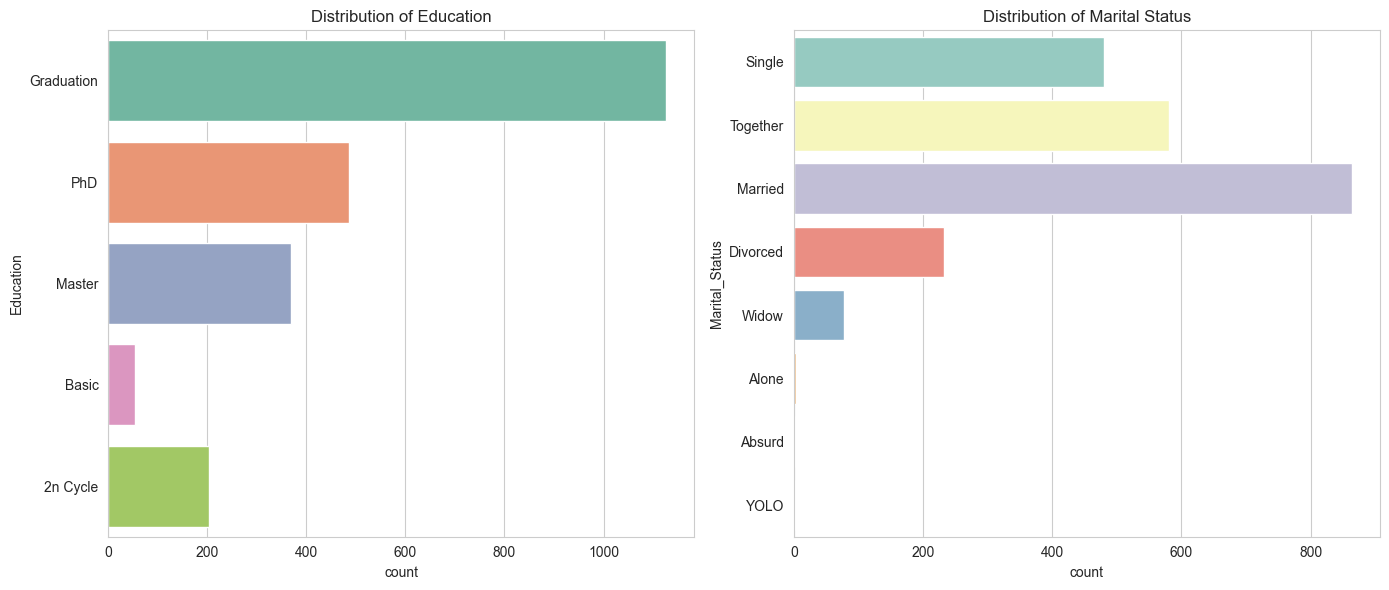

In [30]:
# Create a figure for the categorical variable distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of Education
sns.countplot(y='Education', data=data, ax=ax[0], palette="Set2")
ax[0].set_title('Distribution of Education')

# Distribution of Marital Status
sns.countplot(y='Marital_Status', data=data, ax=ax[1], palette="Set3")
ax[1].set_title('Distribution of Marital Status')

plt.tight_layout()
plt.show()


1. Education: The majority of customers have a Graduation level of education, followed by those with a PhD. Master and 2n Cycle degrees represent smaller segments of the customer base. This distribution suggests a relatively well-educated customer base, which could influence their spending habits and preferences.
2. Marital Status: The Married and Together categories comprise the majority of the customer base, indicating a significant portion of customers are in committed relationships. The Single and Divorced statuses also represent notable segments. This diversity in marital status may impact purchasing behavior, particularly in terms of products and promotions that appeal to individuals versus families.